# <h1> Pengujian LBP vs HAAR Cascade </h1>

In [1]:
import numpy as np
import cv2 as cv
from datetime import datetime
import matplotlib.pyplot as plt

def file_construct(kernel,added):
    return "logtime_"+kernel.split('_')[0]+"_"+added+".log"


def text2array(kernel,added):
    file = open(file_construct(kernel,added), 'r')
    dum = []
    for text in file:
        dum.append(float(text.rstrip()))
    file.closed
    return dum

def calc_accuracy(lis,person):
    detect = [k for k in lis if k == person]
    return len(detect)/len(lis)

def run_video_recog(kernel,person):
    
    face_cascade = cv.CascadeClassifier(kernel)

    cam = cv.VideoCapture(0)
    font = cv.FONT_HERSHEY_SIMPLEX

    file = open(file_construct(kernel,'speed_'+str(person)), 'w')
    arr = []
    n   = 0
    while True:
        _,pic = cam.read()
        gray = cv.cvtColor(pic,cv.COLOR_BGR2GRAY)
        start = datetime.now()
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        end = datetime.now()
        delta = end-start
        dump = 0
        for (x,y,w,h) in faces:
            pic = cv.putText(pic,str(delta.microseconds)+' microsecond',(x,y+h), font, 0.7,(255,255,255),2,cv.LINE_AA)
            pic = cv.rectangle(pic,(x,y),(x+w,y+h),(255,0,0),2)
            dump += 1
        arr.append(dump)
        file.write(str(delta.microseconds/1000)+"\r")

        cv.imshow('vid',pic)
        if ((cv.waitKey(1) & 0xFF == 27) or (n >99)):
            break
        n += 1
    file.closed
    file = None
    
    acc = calc_accuracy(arr,person)
    file = open(file_construct(kernel,'acc_'+str(person)), 'a')
    file.write("{0:.2f}".format(acc)+"\r")
    file.closed
    cv.waitKey(10)
    cam.release()        
    cv.destroyAllWindows()
    
def plot_comp(mode,person):
    LOG_1 = text2array(kernel_1,mode+'_'+str(person))
    LOG_2 = text2array(kernel_2,mode+'_'+str(person))
    plt.plot(LOG_1, label="LBP")
    plt.plot(LOG_2, label="Haar")
    if (mode =="speed"):
        ylbl = 'millisecond'
    else:
        ylbl = '% Acc'
    plt.ylabel(ylbl)
    plt.title(mode+' test antara Haar dan LBP '+str(person)+' wajah')
    plt.legend()
    plt.show()

In [2]:
kernel_1 = 'lbpcascade_frontalface.xml'
run_video_recog(kernel_1,1)

In [3]:
kernel_2 = 'haarcascade_frontalface_default.xml'
run_video_recog(kernel_2,1)

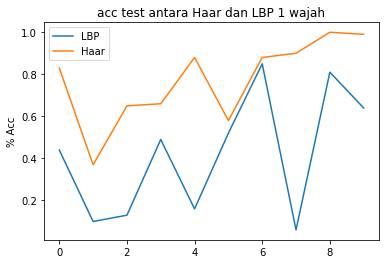

In [4]:
person = 1
mode = "acc"
plot_comp(mode,person)

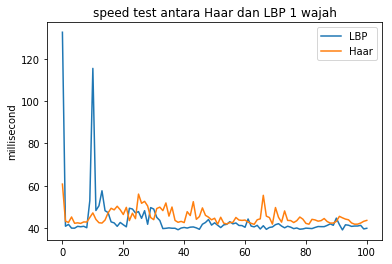

In [5]:
person = 1
mode = 'speed'
plot_comp(mode,person)

In [6]:
kernel_1 = 'lbpcascade_frontalface.xml'
run_video_recog(kernel_1,2)

In [7]:
kernel_2 = 'haarcascade_frontalface_default.xml'
run_video_recog(kernel_2,2)


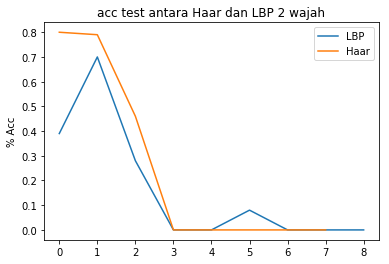

In [8]:
person = 2
mode = "acc"

plot_comp(mode,person)

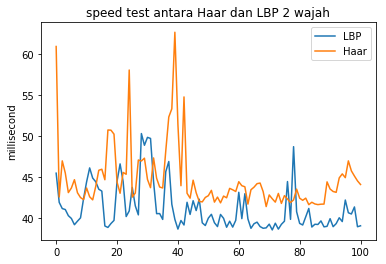

In [9]:
person = 2
mode = "speed"

plot_comp(mode,person)

In [10]:
kernel_2 = 'haarcascade_frontalface_default.xml'
run_video_recog(kernel_2,9)

In [11]:
kernel_1 = 'lbpcascade_frontalface.xml'
run_video_recog(kernel_1,9)